# **Data preprocessing**

In [2]:
import pandas as pd
from pyproj import Transformer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
data1_raw = pd.read_csv('data/dpe-tertiaire.csv')

C:\Users\mouad\AppData\Local\Temp\ipykernel_10832\3725332269.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  data1_raw = pd.read_csv('data/dpe-tertiaire.csv')


In [4]:
data2_raw = pd.read_csv('data/dpe-v2-tertiaire-2.csv')

In [5]:
data1, data2 = data1_raw.copy(), data2_raw.copy()

In [6]:
data1.head()

,id,numero_dpe,usr_diagnostiqueur_id,usr_logiciel_id,tr001_modele_dpe_id,nom_methode_dpe,version_methode_dpe,nom_methode_etude_thermique,version_methode_etude_thermique,date_visite_diagnostiqueur,...,tv017_zone_hiver_code,tv017_zone_hiver_t_ext_moyen,tv017_zone_hiver_peta_cw,tv017_zone_hiver_dh14,tv017_zone_hiver_prs1,tv018_zone_ete_code,tv018_zone_ete_sclim_inf_150,tv018_zone_ete_sclim_sup_150,tv018_zone_ete_rclim_autres_etages,tv018_zone_ete_rclim_dernier_etage
0,179,1330V8000001A,3710,3,8,Méthode Facture,NaN,\N,\N,2013-04-10,...,H3,9.65,14.5,22200,2.9,Ed,5,7,4.0,5
1,355,1356V4000001E,444,3,4,Facture,facture,\N,\N,2013-04-12,...,H2,8.08,12.0,33300,3.4,Ea,2,4,1.5,2
2,410,1317V7000001E,7374,2,7,3CL - DPE,V2012,\N,\N,2013-04-11,...,H2,8.08,12.0,33300,3.4,Ec,4,6,3.0,4
3,429,1369V4000001I,6931,7,4,3CL,Version 1.3,\N,\N,2013-04-02,...,H1,6.58,10.5,42030,3.6,Ec,4,6,3.0,4
4,470,1364V8000001H,231,3,8,Méthode Facture,NaN,\N,\N,2013-04-15,...,H2,8.08,12.0,33300,3.4,Ec,4,6,3.0,4


In [7]:
data2.head()

,N°DPE,Date_réception_DPE,Date_établissement_DPE,Date_visite_diagnostiqueur,Modèle_DPE,N°_DPE_remplacé,Date_fin_validité_DPE,Version_DPE,N°_DPE_immeuble_associé,Méthode_du_DPE,...,Type_énergie_n°2,Type_usage_énergie_n°2,Frais_annuel_énergie_n°2,Année_relève_conso_énergie_n°2,Conso_é_finale_énergie_n°3,Conso_é_primaire_énergie_n°3,Type_énergie_n°3,Type_usage_énergie_n°3,Frais_annuel_énergie_n°3,Année_relève_conso_énergie_n°3
0,2363T1680837R,2023-05-23,2023-05-22,2023-05-11,DPE 2006 tertiaire et ERP,NaN,2033-05-21,2.2,NaN,dpe tertiaire vierge,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2269T2615953W,2022-11-05,2022-11-04,2022-10-19,DPE 2006 tertiaire et ERP,NaN,2032-11-03,2.2,NaN,dpe tertiaire facture,...,Électricité,périmètre de l'usage inconnu,1167.0,2021.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2357T4209637Z,2023-12-07,2023-12-06,2023-12-06,DPE 2006 tertiaire et ERP,NaN,2033-12-05,2.3,NaN,dpe tertiaire vierge dans un bâtiment de logement,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2404T3934296Y,2024-11-07,2024-11-06,2024-07-29,DPE 2006 tertiaire et ERP,2404T3934235P,2034-11-05,2.4,NaN,dpe tertiaire facture,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2360T0127880L,2023-01-16,2023-01-15,2023-01-05,DPE 2006 tertiaire et ERP,NaN,2033-01-14,2.2,NaN,dpe tertiaire vierge,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Unifying columns

### 1- Renaming common columns

In [8]:
data1.rename(columns={'numero_dpe': 'N°DPE', 
                      'date_reception_dpe': 'Date_réception_DPE', 
                      'date_etablissement_dpe': 'Date_établissement_DPE', 
                      'date_visite_diagnostiqueur': 'Date_visite_diagnostiqueur', 
                      'tr001_modele_dpe_id': 'Modèle_DPE', 
                      'nom_methode_dpe': 'Méthode_du_DPE', 
                      'version_methode_dpe': 'Version_DPE', 
                      'secteur_activite': 'Secteur_activité', 
                      'annee_construction': 'Année_construction', 
                      'tr012_categorie_erp_id': 'Catégorie_ERP', 
                      'surface_utile': 'Surface_utile', 
                      'shon': 'Surface_(SHON)', 
                      'code_postal': 'Code_postal_(brut)', 
                      'code_insee_commune': 'Code_INSEE_(BAN)', 
                      'commune': 'Nom__commune_(BAN)', 
                      'nom_rue': 'Nom__rue_(BAN)', 
                      'numero_rue': 'N°_voie_(BAN)', 
                      'etage': 'N°_étage_appartement', 
                      'escalier': "Cage_d'escalier", 
                      'batiment': "Complément_d'adresse_bâtiment", 
                      'consommation_energie': 'Conso_kWhep/m²/an', 
                      'classe_consommation_energie': 'Etiquette_DPE', 
                      'estimation_ges': 'Emission_GES_kgCO2/m²/an', 
                      'classe_estimation_ges': 'Etiquette_GES', 
                      'longitude': 'Coordonnée_cartographique_X_(BAN)', 
                      'latitude': 'Coordonnée_cartographique_Y_(BAN)', 
                      'geo_score': 'Score_BAN', 
                      'geo_adresse': 'Adresse_(BAN)', 
                      'tv016_departement_id': 'N°_département_(BAN)'}, inplace=True)

### 2- Remaining columns

In [9]:
print(f'Number of remaining columns: {len(set(data2.columns) - set(data1.columns))}')
set(data2.columns) - set(data1.columns)  # The remaining columns 

Number of remaining columns: 34


{'Adresse_brute',
 'Année_relève_conso_énergie_n°1',
 'Année_relève_conso_énergie_n°2',
 'Année_relève_conso_énergie_n°3',
 'Code_postal_(BAN)',
 "Complément_d'adresse_logement",
 'Conso_é_finale_énergie_n°1',
 'Conso_é_finale_énergie_n°2',
 'Conso_é_finale_énergie_n°3',
 'Conso_é_primaire_énergie_n°1',
 'Conso_é_primaire_énergie_n°2',
 'Conso_é_primaire_énergie_n°3',
 'Date_fin_validité_DPE',
 'Frais_annuel_énergie_n°1',
 'Frais_annuel_énergie_n°2',
 'Frais_annuel_énergie_n°3',
 'Identifiant__BAN',
 'Invariant_fiscal_logement',
 'Nom__commune_(Brut)',
 'Nom_résidence',
 'Nombre_occupant',
 'N°_DPE_immeuble_associé',
 'N°_DPE_remplacé',
 'N°_immatriculation_copropriété',
 'N°_région_(BAN)',
 'Période_construction',
 'Statut_géocodage',
 'Type_usage_énergie_n°1',
 'Type_usage_énergie_n°2',
 'Type_usage_énergie_n°3',
 'Type_énergie_n°1',
 'Type_énergie_n°2',
 'Type_énergie_n°3',
 'Type_énergie_principale_chauffage'}

### 3- Keeping common columns

In [10]:
common_columns = ['N°DPE',
 'Date_réception_DPE',
 'Date_établissement_DPE',
 'Date_visite_diagnostiqueur',
 'Modèle_DPE',
 'Méthode_du_DPE',
 'Version_DPE',
 'Secteur_activité',
 'Année_construction',
 'Catégorie_ERP',
 'Surface_utile',
 'Surface_(SHON)',
 'Code_postal_(brut)',
 'Code_INSEE_(BAN)',
 'Nom__commune_(BAN)',
 'Nom__rue_(BAN)',
 'N°_voie_(BAN)',
 'N°_étage_appartement',
 "Cage_d'escalier",
 "Complément_d'adresse_bâtiment",
 'Conso_kWhep/m²/an',
 'Etiquette_DPE',
 'Emission_GES_kgCO2/m²/an',
 'Etiquette_GES',
 'Coordonnée_cartographique_X_(BAN)',
 'Coordonnée_cartographique_Y_(BAN)',
 'Score_BAN',
 'Adresse_(BAN)',
 'N°_département_(BAN)']

data1 = data1[common_columns]

data2 = data2[common_columns]

### 4- Adapting the data (10 columns a time)

**Columns 1 to 10**

In [11]:
data1.iloc[:, :10].head()

,N°DPE,Date_réception_DPE,Date_établissement_DPE,Date_visite_diagnostiqueur,Modèle_DPE,Méthode_du_DPE,Version_DPE,Secteur_activité,Année_construction,Catégorie_ERP
0,1330V8000001A,2013-04-11 04:00:00,2013-04-11,2013-04-10,8,Méthode Facture,NaN,"Autres (théâtres, salles de sport, restaurati",1947,\N
1,1356V4000001E,2013-04-15 04:00:00,2013-04-14,2013-04-12,4,Facture,facture,"Bureau, Administration, Enseignement",1983,\N
2,1317V7000001E,2013-04-15 04:00:00,2013-04-11,2013-04-11,7,3CL - DPE,V2012,Commerce,1900,5
3,1369V4000001I,2013-04-15 04:00:00,2013-04-02,2013-04-02,4,3CL,Version 1.3,"Bureaux, administration, enseignement",2001,\N
4,1364V8000001H,2013-04-15 04:00:00,2013-04-15,2013-04-15,8,Méthode Facture,NaN,"Autres (théâtres, salles de sport, restaurati",1947,\N


In [12]:
data2.iloc[:, :10].head()

,N°DPE,Date_réception_DPE,Date_établissement_DPE,Date_visite_diagnostiqueur,Modèle_DPE,Méthode_du_DPE,Version_DPE,Secteur_activité,Année_construction,Catégorie_ERP
0,2363T1680837R,2023-05-23,2023-05-22,2023-05-11,DPE 2006 tertiaire et ERP,dpe tertiaire vierge,2.2,"W : Administrations, banques, bureaux",1988.0,5ème Catégorie
1,2269T2615953W,2022-11-05,2022-11-04,2022-10-19,DPE 2006 tertiaire et ERP,dpe tertiaire facture,2.2,U : Établissements de soins,1979.0,5ème Catégorie
2,2357T4209637Z,2023-12-07,2023-12-06,2023-12-06,DPE 2006 tertiaire et ERP,dpe tertiaire vierge dans un bâtiment de logement,2.3,"M : Magasins de vente, centres commerciaux",NaN,5ème Catégorie
3,2404T3934296Y,2024-11-07,2024-11-06,2024-07-29,DPE 2006 tertiaire et ERP,dpe tertiaire facture,2.4,autres tertiaires non ERP,1990.0,NaN
4,2360T0127880L,2023-01-16,2023-01-15,2023-01-05,DPE 2006 tertiaire et ERP,dpe tertiaire vierge,2.2,"M : Magasins de vente, centres commerciaux",1900.0,5ème Catégorie


We understand from the following that `1` in `Année_construction` column corresponds to missing data, we will replace it with `NaN`.

In [13]:
for c in data1['Année_construction'][:25]:
    print(c, end='\t')

1947	1983	1900	2001	1947	1977	1949	1	1	1947	1	1	1	1990	1	1	1947	2009	1930	1947	1950	1990	1947	1930	1	

In [14]:
data1.Année_construction = data1.Année_construction.apply(lambda x: x if x!=1 else np.nan)

In `data1`, `Date_réception_DPE` also specifies time, we will omit it.

In [15]:
data1.Date_réception_DPE = data1.Date_réception_DPE.apply(lambda x: x[:10])

`Catégorie_ERP` in `data1` refers to `NaN`s as `'\N'`. We will adapt it.

In [16]:
data2.Catégorie_ERP = data2.Catégorie_ERP.apply(lambda x: x[:1] if pd.notna(x) else '\\N')

We omit the following columns:


In [17]:
data1.drop(columns=['Modèle_DPE', 'Méthode_du_DPE', 'Version_DPE'], inplace=True)
data2.drop(columns=['Modèle_DPE', 'Méthode_du_DPE', 'Version_DPE'], inplace=True)

**Columns 10 to 20**

In [18]:
data1.iloc[:, 10:20].head()

,Code_INSEE_(BAN),Nom__commune_(BAN),Nom__rue_(BAN),N°_voie_(BAN),N°_étage_appartement,Cage_d'escalier,Complément_d'adresse_bâtiment,Conso_kWhep/m²/an,Etiquette_DPE,Emission_GES_kgCO2/m²/an
0,30000,NÎMES,14 Rue Notre Dame,NaN,NaN,NaN,NaN,38.00,B,1.00
1,56700,HENNEBONT,5 rue du cabotage,NaN,NaN,NaN,NaN,0.00,N,0.00
2,17300,LA ROCHELLE,des Cloutiers,4,Rez de chaussée,Sans objet,Sans objet,0.00,N,0.00
3,63000,VILLEURBANNE,51 Rue Antoine Primat,51 Rue Antoine Primat,\N,\N,\N,123.39,C,11.53
4,64700,HENDAYE,"ZAC de Sokoburu, 123 Boulevard de la Mer",NaN,NaN,NaN,NaN,0.00,N,0.00


In [19]:
data2.iloc[:, 10:20].head()

,Code_INSEE_(BAN),Nom__commune_(BAN),Nom__rue_(BAN),N°_voie_(BAN),N°_étage_appartement,Cage_d'escalier,Complément_d'adresse_bâtiment,Conso_kWhep/m²/an,Etiquette_DPE,Emission_GES_kgCO2/m²/an
0,63124,Cournon-d'Auvergne,avenue d'Aubière,24ter,0.0,NaN,002ER459997,NaN,NaN,NaN
1,69228,Chabanière,Route de la Condamine,707,0.0,NaN,041122/56101,159.3,C,23.8
2,57540,Phalsbourg,Rue de France,4,0.0,NaN,2023-RW-209-SCI MAVI,NaN,NaN,NaN
3,04197,Sainte-Tulle,Avenue du Languedoc,NaN,NaN,NaN,NaN,66.0,B,1.8
4,60073,Blacourt,Place Yvonne Genty,7,NaN,NaN,NaN,NaN,NaN,NaN


We adapt the types in the following columns.

In [20]:
## Surface_utile, Surface_(SHON), Conso_kWhep/m²/an : 0 is considered NaN

data1['Surface_utile'] = data1['Surface_utile'].apply(lambda x: x if x!='0.00' else np.nan)
data1['Surface_(SHON)'] = data1['Surface_(SHON)'].apply(lambda x: x if x!='0.00' else np.nan)
data1['Conso_kWhep/m²/an'] = data1['Conso_kWhep/m²/an'].apply(lambda x: x if x!='0.00' else np.nan)

We delete the following columns, as we believe they won't help in the study.

In [21]:
data1.drop(columns=['Nom__commune_(BAN)', 'Nom__rue_(BAN)', 'N°_voie_(BAN)', 'N°_étage_appartement', 'Cage_d\'escalier', 'Complément_d\'adresse_bâtiment'], inplace=True)
data2.drop(columns=['Nom__commune_(BAN)', 'Nom__rue_(BAN)', 'N°_voie_(BAN)', 'N°_étage_appartement', 'Cage_d\'escalier', 'Complément_d\'adresse_bâtiment'], inplace=True)

**Last columns**

In [22]:
data1.iloc[:, 15:].head()

,Coordonnée_cartographique_X_(BAN),Coordonnée_cartographique_Y_(BAN),Score_BAN,Adresse_(BAN),N°_département_(BAN)
0,NaN,NaN,0.00,NaN,30
1,NaN,NaN,0.00,NaN,56
2,-1.14895,46.162162,0.97,4 Rue des Cloutiers 17000 La Rochelle,17
3,NaN,NaN,0.00,NaN,69
4,NaN,NaN,0.00,NaN,64


In [23]:
data2.iloc[:, 15:].head()

,Coordonnée_cartographique_X_(BAN),Coordonnée_cartographique_Y_(BAN),Score_BAN,Adresse_(BAN),N°_département_(BAN)
0,712942.36,6516058.35,0.83,24ter avenue d'Aubière 63800 Cournon-d'Auvergne,63
1,828010.81,6499110.54,0.51,707 Route de la Condamine 69440 Chabanière,69
2,1012776.32,6860453.93,0.52,4 Rue de France 57370 Phalsbourg,57
3,923354.37,6303377.93,0.74,Avenue du Languedoc 04220 Sainte-Tulle,04
4,617387.30,6930052.21,0.94,7 Place Yvonne Genty 60650 Blacourt,60


We adapt the types in the following columns.

In [24]:
## Etiquette_DPE
data1['Etiquette_DPE'] = data1['Etiquette_DPE'].apply(lambda x: x if x!='N' else np.nan)
data2['Etiquette_DPE'] = data2['Etiquette_DPE'].apply(lambda x: x if pd.notna(x) else np.nan)

## Emission_GES_kgCO2/m²/an
data1['Emission_GES_kgCO2/m²/an'] = data1['Emission_GES_kgCO2/m²/an'].apply(lambda x: x if x!=0 else np.nan)

## Etiquette_GES
data1['Etiquette_GES'] = data1['Etiquette_GES'].apply(lambda x: x if x!='N' else np.nan)
data2['Etiquette_GES'] = data2['Etiquette_GES'].apply(lambda x: x if pd.notna(x) else np.nan)

## Score_BAN: 0 scores are considered as NaN
data1['Score_BAN'] = data1['Score_BAN'].apply(lambda x: x if x!=0 else np.nan)


In [25]:
## Coordonnée_cartographique_X and Y: The Base Adresse Nationale (BAN) generally uses the Lambert-93 projection system (EPSG:2154)

transformer = Transformer.from_crs("EPSG:4326", "EPSG:2154", always_xy=True)
data1[['Coordonnée_cartographique_X_(BAN)', 'Coordonnée_cartographique_Y_(BAN)']] = data1.apply(
    lambda row: transformer.transform(row['Coordonnée_cartographique_X_(BAN)'], row['Coordonnée_cartographique_Y_(BAN)']),
    axis=1,
    result_type='expand' 
)

We delete the following column, as we deem it unhelpful.

In [26]:
data1.drop(columns='Adresse_(BAN)', inplace=True)
data2.drop(columns='Adresse_(BAN)', inplace=True)

## Assembling and adapting data

In [27]:
data = pd.concat([data1, data2], ignore_index=True)

In [28]:
data.drop(columns='N°DPE', inplace=True)

In [29]:
data.head()

,Date_réception_DPE,Date_établissement_DPE,Date_visite_diagnostiqueur,Secteur_activité,Année_construction,Catégorie_ERP,Surface_utile,Surface_(SHON),Code_postal_(brut),Code_INSEE_(BAN),Conso_kWhep/m²/an,Etiquette_DPE,Emission_GES_kgCO2/m²/an,Etiquette_GES,Coordonnée_cartographique_X_(BAN),Coordonnée_cartographique_Y_(BAN),Score_BAN,N°_département_(BAN)
0,2013-04-11,2013-04-11,2013-04-10,"Autres (théâtres, salles de sport, restaurati",1947.0,\N,40.00,55.30,30000,30000,38.00,B,1.00,A,NaN,NaN,NaN,30
1,2013-04-15,2013-04-14,2013-04-12,"Bureau, Administration, Enseignement",1983.0,\N,5.30,35.43,56700,56700,0.00,NaN,NaN,NaN,NaN,NaN,NaN,56
2,2013-04-15,2013-04-11,2013-04-11,Commerce,1900.0,5,NaN,NaN,17000,17300,0.00,NaN,NaN,NaN,379994.02884,6.570891e+06,0.97,17
3,2013-04-15,2013-04-02,2013-04-02,"Bureaux, administration, enseignement",2001.0,\N,NaN,NaN,69100,63000,123.39,C,11.53,B,NaN,NaN,NaN,69
4,2013-04-15,2013-04-15,2013-04-15,"Autres (théâtres, salles de sport, restaurati",1947.0,\N,NaN,21.10,64700,64700,0.00,NaN,NaN,NaN,NaN,NaN,NaN,64


Fixing types:

In [30]:
numeric_columns = [
    'Surface_utile', 
    'Surface_(SHON)', 
    'Conso_kWhep/m²/an', 
    'Emission_GES_kgCO2/m²/an', 
    'Coordonnée_cartographique_X_(BAN)', 
    'Coordonnée_cartographique_Y_(BAN)', 
    'Score_BAN', 
    'Année_construction', 
    'Catégorie_ERP', 
    'Code_postal_(brut)', 
    'Code_INSEE_(BAN)', 
    'N°_département_(BAN)'
    ]

date_columns = [
    'Date_réception_DPE', 
    'Date_établissement_DPE', 
    'Date_visite_diagnostiqueur'
]

data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')
data[date_columns] = data[date_columns].apply(pd.to_datetime, errors = 'coerce')

In [31]:
data.dtypes

Date_réception_DPE                   datetime64[ns]
Date_établissement_DPE               datetime64[ns]
Date_visite_diagnostiqueur           datetime64[ns]
Secteur_activité                             object
Année_construction                          float64
Catégorie_ERP                               float64
Surface_utile                               float64
Surface_(SHON)                              float64
Code_postal_(brut)                          float64
Code_INSEE_(BAN)                            float64
Conso_kWhep/m²/an                           float64
Etiquette_DPE                                object
Emission_GES_kgCO2/m²/an                    float64
Etiquette_GES                                object
Coordonnée_cartographique_X_(BAN)           float64
Coordonnée_cartographique_Y_(BAN)           float64
Score_BAN                                   float64
N°_département_(BAN)                        float64
dtype: object

Checking how many dates are missing.

In [32]:
data[date_columns].isnull().sum()

Date_réception_DPE             0
Date_établissement_DPE         4
Date_visite_diagnostiqueur    12
dtype: int64

Before mapping the `Secteur_activité` elements to the four provided categories, we will normalize the data to ignore accents and case-sensitivity.

In [33]:
import unicodedata
def normalize_text(text):
    """
    Normalize the text to remove diacritics and convert to lowercase.
    """
    normalized = unicodedata.normalize('NFD', str(text))
    normalized = normalized.encode('ascii', 'ignore').decode('utf-8')
    return normalized.lower()

In [34]:
secteur_activite_mapping = pd.read_csv('utils/mapping_secteur_activite - filtred.csv', encoding='latin1').iloc[:, 0]

In [35]:
data.Secteur_activité = data.Secteur_activité.apply(normalize_text)
secteur_activite_mapping = secteur_activite_mapping.apply(normalize_text)

Here, we check the proportion of the data covered by the provided mapping.

In [36]:
print(f'PROPORTION: {((data.Secteur_activité.isin(secteur_activite_mapping)).sum()/data.shape[0])*100: 02.2f}%')

PROPORTION:  52.31%


**_[Skipped]_**
We deem it not enough. So, for the remaining instances, we're gonna use the following keyword approach to match each instance to a category. We will add it to the dataframe called `mapping`.

In [37]:
"""# Catégorie 1: Batiment a usage principal de bureau, d'administration ou d'enseignement
keywords_bureau = [
    "batiment",
    "bureau",
    "administration",
    "enseignement",
    "immeuble",
    "locaux",
    "pavillon",
    "centre de formation",
    "centre d'etudes",
    "ecole",
    "universite",
    "lycee",
    "college",
    "institut",
    "centre administratif",
    "batiment administratif",
    "batiment scolaire",
    "batiment universitaire",
    "espace de travail",
    "open space",
    "zone administrative",
    "immeuble de bureaux",
    "bureau moderne",
    "espace d'enseignement",
    "batiment institutionnel",
    "batiment public",
    "structure administrative",
    "batiment corporatif",
    "espace bureau",
    "centre de conferences",
    "salle de reunion",
    "administratif",
    "enseignement superieur",
    "enseignement professionnel",
    "batiment de formation"
]

# Catégorie 2: Centre commercial
keywords_commercial = [
    "centre commercial",
    "shopping",
    "mall",
    "boutiques",
    "magasins",
    "zone commerciale",
    "espace de vente",
    "commerce de detail",
    "centre de shopping",
    "complexe commercial",
    "parc commercial",
    "retail",
    "surface commerciale",
    "espace commercial",
    "centre commercial moderne",
    "plaza",
    "hypermarche",
    "supermarche"
]

# Catégorie 3: Batiment a occupation continue (ex: hopitaux, hotels, internats, maisons de retraite, etc)
keywords_occupation_continue  = [
    "batiment",
    "hopital",
    "clinique",
    "centre hospitalier",
    "hotel",
    "internat",
    "maison de retraite",
    "ehpad",
    "residence",
    "logement collectif",
    "structure medicale",
    "centre de soins",
    "soins de sante",
    "residence senior",
    "centre de repos",
    "hebergement"
]"""

'# Catégorie 1: Batiment a usage principal de bureau, d\'administration ou d\'enseignement\nkeywords_bureau = [\n    "batiment",\n    "bureau",\n    "administration",\n    "enseignement",\n    "immeuble",\n    "locaux",\n    "pavillon",\n    "centre de formation",\n    "centre d\'etudes",\n    "ecole",\n    "universite",\n    "lycee",\n    "college",\n    "institut",\n    "centre administratif",\n    "batiment administratif",\n    "batiment scolaire",\n    "batiment universitaire",\n    "espace de travail",\n    "open space",\n    "zone administrative",\n    "immeuble de bureaux",\n    "bureau moderne",\n    "espace d\'enseignement",\n    "batiment institutionnel",\n    "batiment public",\n    "structure administrative",\n    "batiment corporatif",\n    "espace bureau",\n    "centre de conferences",\n    "salle de reunion",\n    "administratif",\n    "enseignement superieur",\n    "enseignement professionnel",\n    "batiment de formation"\n]\n\n# Catégorie 2: Centre commercial\nkeyword

In [38]:
"""def assign_category(batiment):
    norm_bat = normalize_text(batiment)
    # Check for bureau-related terms
    if any(kw in norm_bat for kw in keywords_bureau):
        return "Bâtiment à usage principale de bureau, d'administration ou d'enseignement"
    # Check for centre commercial
    elif any(kw in norm_bat for kw in keywords_commercial):
        return "Centre commercial"
    # Check for occupation continue (hospitals, hotels, internats, etc.)
    elif any(kw in norm_bat for kw in keywords_occupation_continue):
        return "Bâtiment à occupation continue (par exemple: hopitaux, hôtels, internats, maisons de retraite, etc)"
    # Default category for others
    else:
        return "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)"
        """

'def assign_category(batiment):\n    norm_bat = normalize_text(batiment)\n    # Check for bureau-related terms\n    if any(kw in norm_bat for kw in keywords_bureau):\n        return "Bâtiment à usage principale de bureau, d\'administration ou d\'enseignement"\n    # Check for centre commercial\n    elif any(kw in norm_bat for kw in keywords_commercial):\n        return "Centre commercial"\n    # Check for occupation continue (hospitals, hotels, internats, etc.)\n    elif any(kw in norm_bat for kw in keywords_occupation_continue):\n        return "Bâtiment à occupation continue (par exemple: hopitaux, hôtels, internats, maisons de retraite, etc)"\n    # Default category for others\n    else:\n        return "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)"\n        '

In [39]:
"""# Get the `Secteur_activité` entries that are not in the provided mapping
secteur_activite_remaining = pd.DataFrame(data.Secteur_activité[data.Secteur_activité.isin(secteur_activite_mapping).apply(lambda x: not x)].unique())
mapping_remaining = pd.concat([secteur_activite_remaining, secteur_activite_remaining.apply(assign_category, axis=1)], axis=1, ignore_index=True)
mapping_remaining.columns = ['secteur_activite', 'asset_type_cre']"""

"# Get the `Secteur_activité` entries that are not in the provided mapping\nsecteur_activite_remaining = pd.DataFrame(data.Secteur_activité[data.Secteur_activité.isin(secteur_activite_mapping).apply(lambda x: not x)].unique())\nmapping_remaining = pd.concat([secteur_activite_remaining, secteur_activite_remaining.apply(assign_category, axis=1)], axis=1, ignore_index=True)\nmapping_remaining.columns = ['secteur_activite', 'asset_type_cre']"

In [40]:
# Read and normalize the original mapping
mapping_original = pd.read_csv('utils/mapping_secteur_activite - filtred.csv', encoding='latin1')
mapping_original.iloc[:, 0] = secteur_activite_mapping
#mapping = pd.concat([mapping_original, mapping_remaining])

In [41]:
mapping = mapping_original

In [42]:
mapping_dict = mapping.set_index('secteur_activite')['asset_type_cre'].to_dict()

Before applying the mapping, we drop all _out-of-scope_ samples. 

In [43]:
data = data[data.Secteur_activité.isin(mapping_dict)]

In [44]:
data.Secteur_activité = data.Secteur_activité.apply(lambda x: mapping_dict[x])

In [45]:
data.Secteur_activité.unique()

array(["Bâtiment à usage principale de bureau, d'administration ou d'enseignement",
       'Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)',
       'Centre commercial',
       'Bâtiment à occupation continue (par exemple: hopitaux, hôtels, internats, maisons de retraite, etc)'],
      dtype=object)

We will now rename the final columns to something more standard.

In [46]:
data.columns

Index(['Date_réception_DPE', 'Date_établissement_DPE',
       'Date_visite_diagnostiqueur', 'Secteur_activité', 'Année_construction',
       'Catégorie_ERP', 'Surface_utile', 'Surface_(SHON)',
       'Code_postal_(brut)', 'Code_INSEE_(BAN)', 'Conso_kWhep/m²/an',
       'Etiquette_DPE', 'Emission_GES_kgCO2/m²/an', 'Etiquette_GES',
       'Coordonnée_cartographique_X_(BAN)',
       'Coordonnée_cartographique_Y_(BAN)', 'Score_BAN',
       'N°_département_(BAN)'],
      dtype='object')

In [47]:
data.columns = [
    'date_reception_dpe',
    'date_etablissement_dpe',
    'date_visite_diag',
    'sect_activite',
    'annee_construction',
    'categorie_erp',
    'surface_utile',
    'surface_shon',
    'code_postal',
    'code_insee',
    'conso_energie',
    'etiquette_dpe',
    'emission_ges',
    'etiquette_ges',
    'coord_x',
    'coord_y',
    'score_ban',
    'num_departement'
 ]

In [48]:
data.head()

,date_reception_dpe,date_etablissement_dpe,date_visite_diag,sect_activite,annee_construction,categorie_erp,surface_utile,surface_shon,code_postal,code_insee,conso_energie,etiquette_dpe,emission_ges,etiquette_ges,coord_x,coord_y,score_ban,num_departement
1,2013-04-15,2013-04-14,2013-04-12,"Bâtiment à usage principale de bureau, d'admin...",1983.0,NaN,5.30,35.43,56700.0,56700.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,56.0
2,2013-04-15,2013-04-11,2013-04-11,"Autres cas (par exemple: théâtres, salles de s...",1900.0,5.0,NaN,NaN,17000.0,17300.0,0.00,NaN,NaN,NaN,379994.028840,6.570891e+06,0.97,17.0
3,2013-04-15,2013-04-02,2013-04-02,"Bâtiment à usage principale de bureau, d'admin...",2001.0,NaN,NaN,NaN,69100.0,63000.0,123.39,C,11.53,B,NaN,NaN,NaN,69.0
5,2013-04-16,2013-04-16,2013-04-11,"Autres cas (par exemple: théâtres, salles de s...",1977.0,NaN,1616.36,NaN,79320.0,79069.0,0.00,NaN,NaN,NaN,430837.427049,6.635441e+06,0.95,79.0
6,2013-04-16,2013-04-16,2013-04-12,"Autres cas (par exemple: théâtres, salles de s...",1949.0,NaN,NaN,NaN,66740.0,66175.0,494.02,F,16.08,C,693369.767030,6.160409e+06,0.96,66.0


Before encoding the string data in `sect_activite`, we are going to shorten the names of the four categories for convenience.

In [49]:
def shorten(category: str):
    match category:
        case "Bâtiment à usage principale de bureau, d'administration ou d'enseignement":
            return "admin"
        case "Centre commercial":
            return "centre_com"
        case "Bâtiment à occupation continue (par exemple: hopitaux, hôtels, internats, maisons de retraite, etc)":
            return "occup_cont"
        case "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)":
            return "autre"
        
data.sect_activite = data.sect_activite.apply(shorten)

In [50]:
data=pd.get_dummies(data,columns=['sect_activite'], prefix='sect_act', dtype=float)

In [51]:
data.head()

,date_reception_dpe,date_etablissement_dpe,date_visite_diag,annee_construction,categorie_erp,surface_utile,surface_shon,code_postal,code_insee,conso_energie,...,emission_ges,etiquette_ges,coord_x,coord_y,score_ban,num_departement,sect_act_admin,sect_act_autre,sect_act_centre_com,sect_act_occup_cont
1,2013-04-15,2013-04-14,2013-04-12,1983.0,NaN,5.30,35.43,56700.0,56700.0,0.00,...,NaN,NaN,NaN,NaN,NaN,56.0,1.0,0.0,0.0,0.0
2,2013-04-15,2013-04-11,2013-04-11,1900.0,5.0,NaN,NaN,17000.0,17300.0,0.00,...,NaN,NaN,379994.028840,6.570891e+06,0.97,17.0,0.0,1.0,0.0,0.0
3,2013-04-15,2013-04-02,2013-04-02,2001.0,NaN,NaN,NaN,69100.0,63000.0,123.39,...,11.53,B,NaN,NaN,NaN,69.0,1.0,0.0,0.0,0.0
5,2013-04-16,2013-04-16,2013-04-11,1977.0,NaN,1616.36,NaN,79320.0,79069.0,0.00,...,NaN,NaN,430837.427049,6.635441e+06,0.95,79.0,0.0,1.0,0.0,0.0
6,2013-04-16,2013-04-16,2013-04-12,1949.0,NaN,NaN,NaN,66740.0,66175.0,494.02,...,16.08,C,693369.767030,6.160409e+06,0.96,66.0,0.0,1.0,0.0,0.0


## Deleting irrelevant columns

In the following, we will discard the following columns:

In [52]:
to_delete = [
    'date_visite_diag', 
    'date_reception_dpe', 
    'categorie_erp', 
    'surface_shon', 
    'code_insee', 
    'etiquette_dpe',
    'conso_energie',  
    'etiquette_ges', 
    'score_ban'
]

These are columns that we think are irrelevant to the study. Deleting them rids us of some `NaN`s, which is a good thing.

In [53]:
# Only for the study of correlation, we're going to get rid of all the `NaN`s and the categorical columns

data_float = data.drop(columns=[
    'date_reception_dpe', 
    'date_etablissement_dpe',
    'date_visite_diag',
    'categorie_erp',
    'etiquette_dpe', 
    'etiquette_ges', 
    'sect_act_admin', 
    'sect_act_autre', 
    'sect_act_centre_com', 
    'sect_act_occup_cont'
])
data_no_nan = data_float.dropna().reset_index(drop=True)
data_no_nan

,annee_construction,surface_utile,surface_shon,code_postal,code_insee,conso_energie,emission_ges,coord_x,coord_y,score_ban,num_departement
0,1947.0,95.00,95.00,63260.0,63260.0,130.00,35.00,751520.207866,6.512880e+06,0.32,63.0
1,1947.0,100.00,52.00,93700.0,93700.0,1702.00,55.00,781765.899360,6.800780e+06,0.70,93.0
2,1947.0,100.00,34.00,75014.0,75014.0,188.00,44.00,650006.034855,6.853337e+06,0.40,75.0
3,1947.0,100.00,300.00,74120.0,74120.0,181.00,54.00,951115.364291,6.548562e+06,0.37,74.0
4,2013.0,518.18,1809.09,56000.0,56260.0,35.52,2.19,266329.034026,6.745604e+06,0.97,56.0
...,...,...,...,...,...,...,...,...,...,...,...
79319,1947.0,100.00,139.00,75008.0,75108.0,0.10,0.10,649830.450000,6.863921e+06,0.71,75.0
79320,1994.0,100.00,136.00,73460.0,73129.0,245.10,6.80,953916.380000,6.504716e+06,0.47,73.0
79321,1957.0,100.00,258.00,15000.0,15014.0,854.90,23.80,656209.310000,6.424003e+06,0.60,15.0
79322,2022.0,293.30,293.30,76230.0,76108.0,217.00,6.00,563499.790000,6.931384e+06,0.66,76.0


The deletion of some of these is also based on the following correlation study, that reveals redundancy in the data. 
- For example, from the correlation plot, we can clearly see that there is a `1.00` correlation between our target `emission_ges` and `conso_energie`. So, we deem it would be naive to try and use it as a predictor, as `emission_ges` is clearly derived from it.
- We can also see that there is a very high correlation between the columns: `code_postal` and `code_insee`. We chose to discard `code_insee`.

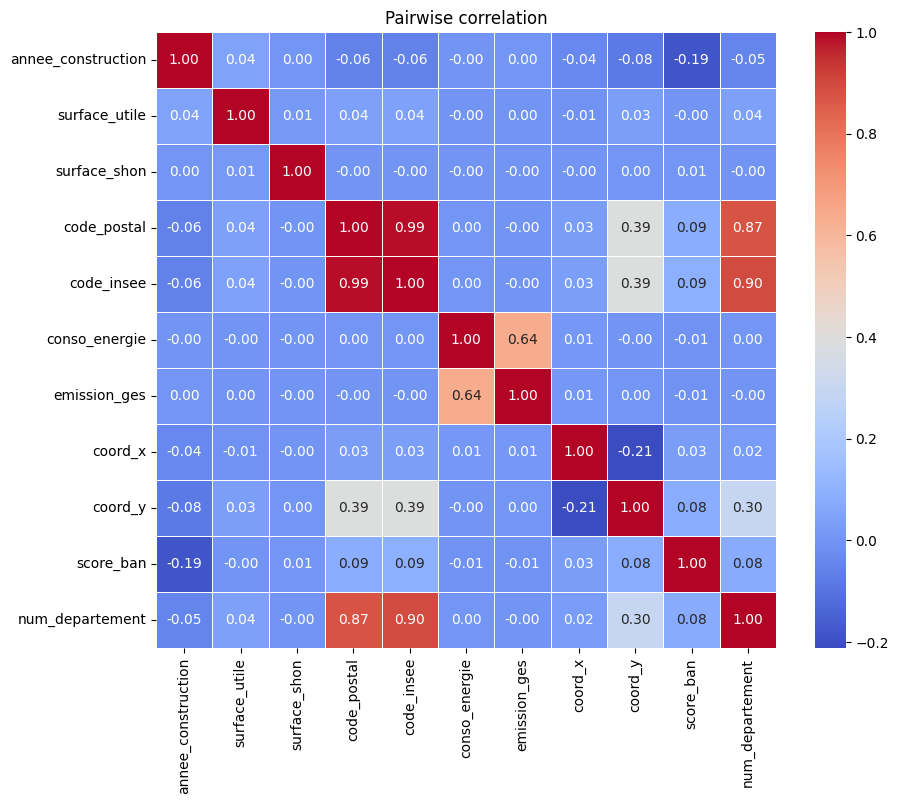

In [54]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_no_nan.corr(), cmap='coolwarm', annot=True, fmt='.02f', linewidths=0.5)
plt.title('Pairwise correlation')
plt.show()

In [55]:
data.drop(columns=to_delete, inplace=True)

In [56]:
data.head()

,date_etablissement_dpe,annee_construction,surface_utile,code_postal,emission_ges,coord_x,coord_y,num_departement,sect_act_admin,sect_act_autre,sect_act_centre_com,sect_act_occup_cont
1,2013-04-14,1983.0,5.30,56700.0,NaN,NaN,NaN,56.0,1.0,0.0,0.0,0.0
2,2013-04-11,1900.0,NaN,17000.0,NaN,379994.028840,6.570891e+06,17.0,0.0,1.0,0.0,0.0
3,2013-04-02,2001.0,NaN,69100.0,11.53,NaN,NaN,69.0,1.0,0.0,0.0,0.0
5,2013-04-16,1977.0,1616.36,79320.0,NaN,430837.427049,6.635441e+06,79.0,0.0,1.0,0.0,0.0
6,2013-04-16,1949.0,NaN,66740.0,16.08,693369.767030,6.160409e+06,66.0,0.0,1.0,0.0,0.0


## Dealing with Outliers

### 1- For the target data

We consider, first, that the negative values in each column are typos. Hence, we only consider *the absolute values*.

In [57]:
data.emission_ges = abs(data.emission_ges)

First, let's examine the distribution of our target data using a box plot.

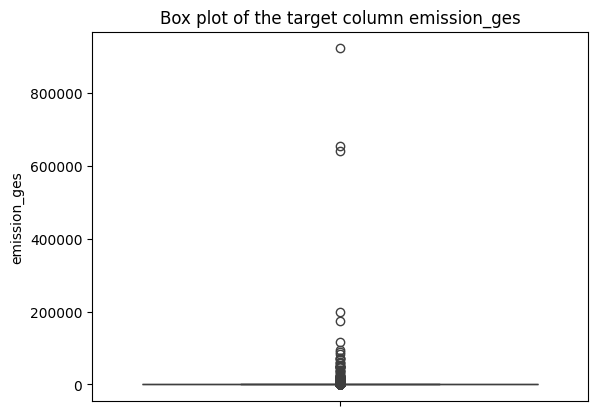

In [58]:
# Box plot for the target column
sns.boxplot(data, y='emission_ges')
plt.title("Box plot of the target column emission_ges")
plt.show()

We can clearly see that the data contains a lot of outliers. In the following, we will examine outliers using the **IQR (Interrange Quantile)** method.

In [59]:
q1 = data.emission_ges.quantile(0.25)
q3 = data.emission_ges.quantile(0.75)
iqr = q3 - q1  # Interrange Quantile
lower_bound = q1 - 1.5 * iqr  # < lower_bound ==> OUTLIER
upper_bound = q1 + 1.5 * iqr  # > lower_bound ==> OUTLIER

Let's compute the fraction of outliers to decide whether it would be feasible to just remove them.

In [60]:
print(f'PROPORTION: {(((data.emission_ges < lower_bound) | (data.emission_ges > upper_bound)).sum()/data.shape[0])*100: .2f}%')

PROPORTION:  8.97%


As it doesn't lead to a significant data-loss. We will discard all the outliers.

In [61]:
data = data[((data.emission_ges >= lower_bound) & (data.emission_ges <= upper_bound)) | data.emission_ges.isna()].reset_index(drop=True)  # It should keep the missing values as they are
data

,date_etablissement_dpe,annee_construction,surface_utile,code_postal,emission_ges,coord_x,coord_y,num_departement,sect_act_admin,sect_act_autre,sect_act_centre_com,sect_act_occup_cont
0,2013-04-14,1983.0,5.30,56700.0,NaN,NaN,NaN,56.0,1.0,0.0,0.0,0.0
1,2013-04-11,1900.0,NaN,17000.0,NaN,379994.028840,6.570891e+06,17.0,0.0,1.0,0.0,0.0
2,2013-04-02,2001.0,NaN,69100.0,11.53,NaN,NaN,69.0,1.0,0.0,0.0,0.0
3,2013-04-16,1977.0,1616.36,79320.0,NaN,430837.427049,6.635441e+06,79.0,0.0,1.0,0.0,0.0
4,2013-04-16,1949.0,NaN,66740.0,16.08,693369.767030,6.160409e+06,66.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
419814,2024-03-27,1949.0,69.20,54000.0,NaN,933811.020000,6.848530e+06,54.0,0.0,0.0,1.0,0.0
419815,2024-08-01,NaN,100.00,77310.0,NaN,664312.900000,6.826206e+06,77.0,1.0,0.0,0.0,0.0
419816,2022-05-15,1930.0,648.00,59400.0,NaN,717101.920000,7.008759e+06,59.0,1.0,0.0,0.0,0.0
419817,2023-05-25,NaN,100.00,59440.0,NaN,766610.290000,7.003010e+06,59.0,0.0,0.0,0.0,1.0


Let's now re-examine the box plot of the target column.

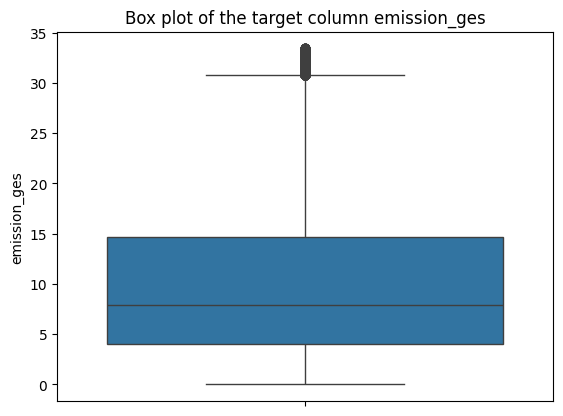

In [62]:
# Box plot for the target column
sns.boxplot(data, y='emission_ges')
plt.title("Box plot of the target column emission_ges")
plt.show()

Let's now explore the distribution of the resulting target column.

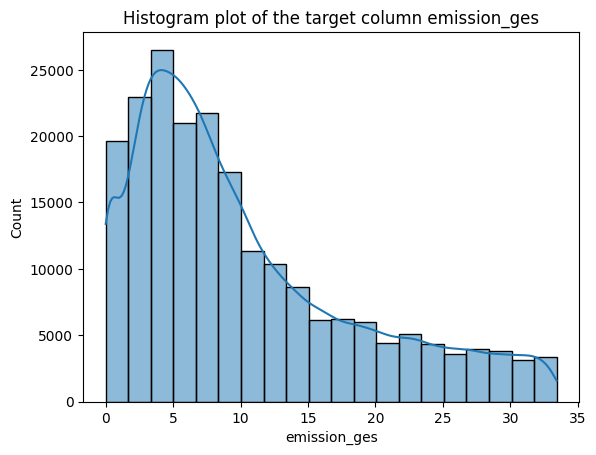

In [63]:
# Histogram-density plot for the target column
sns.histplot(data, x='emission_ges', kde=True, bins=20)
plt.title("Histogram plot of the target column emission_ges")
plt.show()

We can clearly see that the number of outliers is reduced substancialy.

### 2- For other columns

First, let's take the absolute value of columns that shouldn't take negative values.

In [64]:
data.iloc[:, 1:] = abs(data.iloc[:, 1:])

Here, we define a function that computes the IQR bounds for an arbitrary column.

In [65]:
def compute_iqr_bounds(column_name: str):
    q1 = data[column_name].quantile(0.25)
    q3 = data[column_name].quantile(0.75)
    iqr = q3 - q1 
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q1 + 1.5 * iqr
    return (lower_bound, upper_bound)

Depending on weather it leads to a significant data loss or not, we decide, for each column, either to trim (remove outliers) or cap.

In [66]:
def cap(x: float, lower_bound: float, upper_bound: float):
    if x < lower_bound: return lower_bound
    elif x > upper_bound: return upper_bound
    else: return x


In [67]:
def trim_or_cap(column_name: str, lower_bound: float, upper_bound: float, threshold=50000):
    global data
    nb_outliers = ((data[column_name] < lower_bound) | (data[column_name] > upper_bound)).sum()
    if nb_outliers <= threshold:
        data = data[((data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)) | data[column_name].isna()].reset_index(drop=True)
        print(f'column \'{column_name}\': trimmed')
    else:
        data[column_name] = data[column_name].apply(lambda x: cap(x, lower_bound, upper_bound))
        print(f'column \'{column_name}\': capped')

In [68]:
# We exclude the columns corresponding to the one hot encoding and the target column
for column_name in ['annee_construction', 'code_postal', 'coord_x', 'coord_y', 'num_departement']:  
    lower_bound, upper_bound = compute_iqr_bounds(column_name)
    trim_or_cap(column_name, lower_bound, upper_bound)

column 'annee_construction': trimmed
column 'code_postal': trimmed
column 'coord_x': trimmed
column 'coord_y': trimmed
column 'num_departement': trimmed


We also exclude `surface_utile` as it gets capped every time and the result is always unsatisfactory. So, we will try to process it manually.

In [69]:
for threshold in [1e1, 1e2, 1e3, 1e4, 1e5, 1e6]:
    print(f'Number of buildings with a surface larger than {threshold}: {(data.surface_utile > threshold).sum()}')

Number of buildings with a surface larger than 10.0: 312165
Number of buildings with a surface larger than 100.0: 33504
Number of buildings with a surface larger than 1000.0: 9592
Number of buildings with a surface larger than 10000.0: 1134
Number of buildings with a surface larger than 100000.0: 33
Number of buildings with a surface larger than 1000000.0: 0


As the area of a large regional mall could surpass $100,000 m^2$, we will keep the `surface_utile` column as is.

Now, we can guarantee that the data has no outliers.

In [70]:
data

,date_etablissement_dpe,annee_construction,surface_utile,code_postal,emission_ges,coord_x,coord_y,num_departement,sect_act_admin,sect_act_autre,sect_act_centre_com,sect_act_occup_cont
0,2013-04-14,1983.0,5.30,56700.0,NaN,NaN,NaN,56.0,1.0,0.0,0.0,0.0
1,2013-04-11,1900.0,NaN,17000.0,NaN,379994.028840,6.570891e+06,17.0,0.0,1.0,0.0,0.0
2,2013-04-02,2001.0,NaN,69100.0,11.53,NaN,NaN,69.0,1.0,0.0,0.0,0.0
3,2013-04-16,1977.0,1616.36,79320.0,NaN,430837.427049,6.635441e+06,79.0,0.0,1.0,0.0,0.0
4,2013-04-16,1949.0,NaN,66740.0,16.08,693369.767030,6.160409e+06,66.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
384629,2024-03-27,1949.0,69.20,54000.0,NaN,933811.020000,6.848530e+06,54.0,0.0,0.0,1.0,0.0
384630,2024-08-01,NaN,100.00,77310.0,NaN,664312.900000,6.826206e+06,77.0,1.0,0.0,0.0,0.0
384631,2022-05-15,1930.0,648.00,59400.0,NaN,717101.920000,7.008759e+06,59.0,1.0,0.0,0.0,0.0
384632,2023-05-25,NaN,100.00,59440.0,NaN,766610.290000,7.003010e+06,59.0,0.0,0.0,0.0,1.0


## Dealing with missing values

### 1- Counting missing values

We consider at first to delete all the rows that contain at least one `NaN` value, but it omits a considerable proportion of the data. Only the following proportion is kept in this case:

In [71]:
print(f'PROPORTION = {((data.shape[0] - data.isnull().any(axis=1).sum())/data.shape[0])*100: 02.2f}%')

PROPORTION =  18.77%


The proportions of `NaN`s by columns are presented bellow:

In [72]:
pd.DataFrame(((data.isnull().sum()/data.shape[0])*100).apply(lambda x: f'{x: 02.2f}%'), columns=['proportion'])

,proportion
date_etablissement_dpe,0.00%
annee_construction,45.01%
surface_utile,18.81%
code_postal,0.05%
emission_ges,50.56%
coord_x,8.62%
coord_y,8.62%
num_departement,0.18%
sect_act_admin,0.00%
sect_act_autre,0.00%


### 2- Imputing missing values

Let's drop `NaN` instances of our target column.

In [73]:
data_natarget = data[data.emission_ges.isna()]
data_natarget

,date_etablissement_dpe,annee_construction,surface_utile,code_postal,emission_ges,coord_x,coord_y,num_departement,sect_act_admin,sect_act_autre,sect_act_centre_com,sect_act_occup_cont
0,2013-04-14,1983.0,5.30,56700.0,NaN,NaN,NaN,56.0,1.0,0.0,0.0,0.0
1,2013-04-11,1900.0,NaN,17000.0,NaN,379994.028840,6.570891e+06,17.0,0.0,1.0,0.0,0.0
3,2013-04-16,1977.0,1616.36,79320.0,NaN,430837.427049,6.635441e+06,79.0,0.0,1.0,0.0,0.0
7,2013-04-17,1947.0,100.00,83600.0,NaN,NaN,NaN,83.0,1.0,0.0,0.0,0.0
11,2013-04-19,NaN,153.50,92160.0,NaN,NaN,NaN,92.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
384629,2024-03-27,1949.0,69.20,54000.0,NaN,933811.020000,6.848530e+06,54.0,0.0,0.0,1.0,0.0
384630,2024-08-01,NaN,100.00,77310.0,NaN,664312.900000,6.826206e+06,77.0,1.0,0.0,0.0,0.0
384631,2022-05-15,1930.0,648.00,59400.0,NaN,717101.920000,7.008759e+06,59.0,1.0,0.0,0.0,0.0
384632,2023-05-25,NaN,100.00,59440.0,NaN,766610.290000,7.003010e+06,59.0,0.0,0.0,0.0,1.0


In [74]:
data_cleantarget = data[data.emission_ges.notna()]

Now for the date column, as we know from before that the number of `NaN` is insignificant (around 4), we will simply discard rows where the date is missing.

In [75]:
data = data[data.date_etablissement_dpe.notna()]

Now, looking at the distribution of the clean data, and comparing it with the original data, we notice that it's quite a good sample and that there is no significant bias for rows with missing target values. Thus, applying __KNN__ to impute the missing values seems like a legitimate strategy.

In [76]:
data_natarget.describe()

,date_etablissement_dpe,annee_construction,surface_utile,code_postal,emission_ges,coord_x,coord_y,num_departement,sect_act_admin,sect_act_autre,sect_act_centre_com,sect_act_occup_cont
count,194489,98554.000000,159262.000000,194396.000000,0.0,178863.000000,1.788630e+05,194166.000000,194489.000000,194489.000000,194489.000000,194489.000000
mean,2021-04-29 05:09:09.729804800,1962.892648,172.255139,52679.175513,NaN,652159.672948,6.642154e+06,52.549324,0.457558,0.211858,0.230959,0.099625
min,2006-01-08 00:00:00,1874.000000,0.000000,0.000000,NaN,129266.270000,6.142734e+06,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2019-01-16 00:00:00,1947.000000,100.000000,31260.000000,NaN,533487.100249,6.422997e+06,31.000000,0.000000,0.000000,0.000000,0.000000
50%,2022-07-19 00:00:00,1949.000000,100.000000,56300.000000,NaN,653546.292593,6.691548e+06,56.000000,0.000000,0.000000,0.000000,0.000000
75%,2023-11-19 00:00:00,1988.000000,100.000000,75013.000000,NaN,810244.645000,6.862792e+06,75.000000,1.000000,0.000000,0.000000,0.000000
max,2025-01-19 00:00:00,2020.000000,346260.000000,95974.000000,NaN,986602.680000,7.069996e+06,97.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,29.406851,1285.130064,26377.409050,NaN,187245.883190,2.515938e+05,26.361997,0.498197,0.408626,0.421447,0.299500


In [77]:
data_cleantarget.describe()

,date_etablissement_dpe,annee_construction,surface_utile,code_postal,emission_ges,coord_x,coord_y,num_departement,sect_act_admin,sect_act_autre,sect_act_centre_com,sect_act_occup_cont
count,190145,112943.000000,153029.000000,190030.000000,190145.000000,172625.000000,1.726250e+05,189773.000000,190145.000000,190145.000000,190145.000000,190145.000000
mean,2020-12-29 23:45:33.932525312,1972.012458,399.719479,54130.934479,10.314151,648999.332122,6.654920e+06,54.021515,0.509080,0.163601,0.206185,0.121134
min,2008-04-07 00:00:00,1874.000000,0.910000,0.000000,0.000000,129072.850000,6.144978e+06,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-05-28 00:00:00,1947.000000,100.000000,33127.000000,4.000000,510241.770000,6.464317e+06,33.000000,0.000000,0.000000,0.000000,0.000000
50%,2022-02-11 00:00:00,1974.000000,100.000000,57260.000000,7.900000,652593.960000,6.700115e+06,57.000000,1.000000,0.000000,0.000000,0.000000
75%,2023-09-24 00:00:00,2000.000000,100.000000,75017.000000,14.750000,832632.530000,6.862030e+06,75.000000,1.000000,0.000000,0.000000,0.000000
max,2025-01-19 00:00:00,2020.000000,200977.700000,95974.000000,33.440000,986600.710000,7.069991e+06,97.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,30.058109,2814.461029,26283.909452,8.333846,195379.692865,2.397448e+05,26.255142,0.499919,0.369915,0.404566,0.326284


In [78]:
imputer = KNNImputer(n_neighbors=7, weights="uniform")
data_imputed = imputer.fit_transform(data.iloc[:, 1:])

In [79]:
pd.DataFrame(data_imputed, columns=data.columns[1:]).to_csv('data_imputed.csv')

In [80]:
data_imputed_full = pd.concat([data.date_etablissement_dpe, pd.DataFrame(data_imputed, columns=data.columns[1:])], axis=1)

In [81]:
data_imputed_full

,date_etablissement_dpe,annee_construction,surface_utile,code_postal,emission_ges,coord_x,coord_y,num_departement,sect_act_admin,sect_act_autre,sect_act_centre_com,sect_act_occup_cont
0,2013-04-14,1983.0,5.300000,56700.0,18.228571,235232.573267,6.760084e+06,56.0,1.0,0.0,0.0,0.0
1,2013-04-11,1900.0,100.000000,17000.0,5.714286,379994.028840,6.570891e+06,17.0,0.0,1.0,0.0,0.0
2,2013-04-02,2001.0,100.000000,69100.0,11.530000,846390.890452,6.520861e+06,69.0,1.0,0.0,0.0,0.0
3,2013-04-16,1977.0,1616.360000,79320.0,24.454286,430837.427049,6.635441e+06,79.0,0.0,1.0,0.0,0.0
4,2013-04-16,1949.0,266.321429,66740.0,16.080000,693369.767030,6.160409e+06,66.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
384629,2024-03-27,1949.0,69.200000,54000.0,12.235714,933811.020000,6.848530e+06,54.0,0.0,0.0,1.0,0.0
384630,2024-08-01,1947.0,100.000000,77310.0,16.857143,664312.900000,6.826206e+06,77.0,1.0,0.0,0.0,0.0
384631,2022-05-15,1930.0,648.000000,59400.0,22.505714,717101.920000,7.008759e+06,59.0,1.0,0.0,0.0,0.0
384632,2023-05-25,1947.0,100.000000,59440.0,9.571429,766610.290000,7.003010e+06,59.0,0.0,0.0,0.0,1.0


Now, let's check out the distribution of the resulting data.

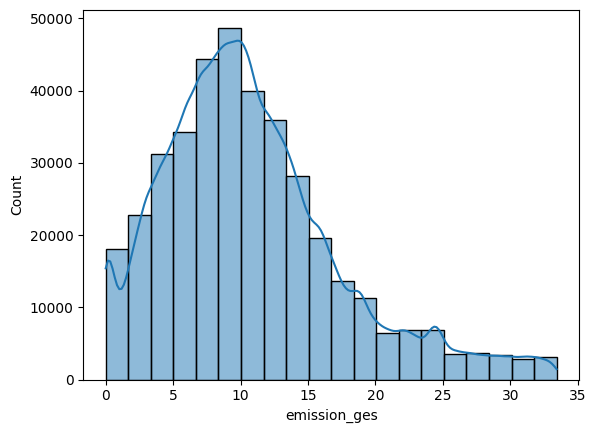

In [82]:
sns.histplot(data_imputed_full.emission_ges, kde=True, bins=20)
plt.show()

**Verifying effectiveness of imputation**

Explained variance: [0.20609628 0.14828508 0.11687303]


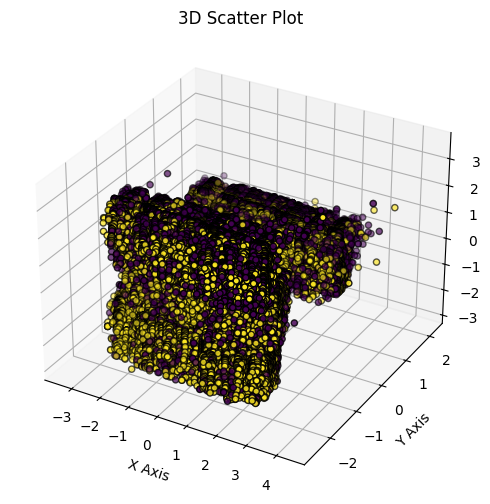

In [83]:
scaler=StandardScaler()
data_imputed_scaled=scaler.fit_transform(data_imputed)

pca=PCA(n_components=3)
pca_result=pca.fit_transform(data_imputed_scaled)
df_pca=pd.DataFrame(pca_result,columns=['x','y','z'])
explained=pca.explained_variance_ratio_
print(f'Explained variance: {explained}')

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_pca.x, df_pca.y, df_pca.z, c=data.isna().any(axis=1), edgecolor='k')

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Scatter Plot')

plt.show()

#

It seems _satisfactory_, we will save it as our final preprocessed data that we are going to use for the training process.

In [84]:
data_imputed_full.to_csv('data_final.csv')